In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.style.use('ggplot')

In [3]:
path = 'storage/yelp_data/health_raw00.csv'

In [4]:
df = pd.read_csv(path)
df.drop(['Unnamed: 0'],axis=1,inplace=True)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54756 entries, 0 to 54755
Data columns (total 12 columns):
business_id    54756 non-null object
name           54756 non-null object
categories     54756 non-null object
cool           54756 non-null int64
date           54756 non-null object
funny          54756 non-null int64
review_id      54756 non-null object
stars          54756 non-null int64
text           54756 non-null object
useful         54756 non-null int64
user_id        54756 non-null object
len_text       54756 non-null int64
dtypes: int64(5), object(7)
memory usage: 5.0+ MB


In [6]:
df.head()

,business_id,name,categories,cool,date,funny,review_id,stars,text,useful,user_id,len_text
0,y-4xTZNKVm8mAZpiXMS5ZA,"Lauren Byrne, MD","urologists, doctors, health & medical",0,2018-03-03,0,TNNkSmMfshsD3G60jTNjDA,1,Please stay away from this place if you can! I...,2,xv2V2GO5IZYvtw4oW7gQ1w,2002
1,y-4xTZNKVm8mAZpiXMS5ZA,"Lauren Byrne, MD","urologists, doctors, health & medical",0,2015-11-29,0,v-iKdstPdCxJr8zV1ZMdrw,5,My husband has been a patient of Dr. Byrne for...,1,SjvWP7c9toeZoV_q62zhTA,877
2,y-4xTZNKVm8mAZpiXMS5ZA,"Lauren Byrne, MD","urologists, doctors, health & medical",0,2016-06-03,0,BmNDRCV9_NzQ_KCChyfdEw,4,Dr. Byrne is a great doctor! She has great bed...,2,sZVHm1aLtvyH9trAc2_MgA,333
3,y-4xTZNKVm8mAZpiXMS5ZA,"Lauren Byrne, MD","urologists, doctors, health & medical",0,2017-03-17,0,t_TKVMxKFYm9Hl-TIO7UUw,3,I'm raising my review as Dr Bryne's has been m...,3,8Y_irXocZdZxLs_qgzpjBw,649
4,y-4xTZNKVm8mAZpiXMS5ZA,"Lauren Byrne, MD","urologists, doctors, health & medical",0,2016-08-31,0,NWRrpGRgWZBBj3lvCZGVKA,1,I wish I could give 0 stars. Worst office I've...,1,hVKPDGpG12z7vpScXaSakw,1408


## split review stars and text

In [7]:
data = df[['stars','text']]

In [8]:
pd.set_option('display.max_colwidth', 500)

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54756 entries, 0 to 54755
Data columns (total 2 columns):
stars    54756 non-null int64
text     54756 non-null object
dtypes: int64(1), object(1)
memory usage: 855.6+ KB


In [10]:
data.head()

,stars,text
0,1,Please stay away from this place if you can! It's the worst care imaginable! The staff is very uneducated and doesn't know anything. If you ask a question they give you an answer that doesn't even pertain to what you just asked. It's super bizarre. Dr Byrne doesn't seem to care at all about how you feel I got the impression she just wants to get you in and out and make her money. That's just the feeling that was put out there in my visit. The staff is super rude. I wanted to speak again with...
1,5,My husband has been a patient of Dr. Byrne for the last year and a half. Last May he was suffering from kidney stones and we were referred to Dr. Byrne. After being examined and having tests run it was determined he would need surgery. He was scheduled for surgery a week later and sent home with major pain medications. Even while taking the medications my husband was so incapacitated and in such pain Dr. Bryne went out of her way to call other hospitals and reschedule him for emergency surg...
2,4,Dr. Byrne is a great doctor! She has great bed side manners and explains to you step by step of what shes doing. The office staff is not the best. They always make you wait a long time before you get called back. But my overall experience with Dr. Byrne is very good. Im happy i chose her for my procedure and i highly recommend her.
3,3,"I'm raising my review as Dr Bryne's has been more receptive. My daughter can go in anytime and leave urine sample, so she doesn't have to go to Urgent Care who seems to always mess up anyway and doesn't provide info back to Dr.\n\nShe is very smart. If things keep looking up, I may try her out with other family members. I heard her coach receptionist on last visit in a nice and professional way. \n\nIn general I don't understand why medical receptionists can be so bad across the medical ..."
4,1,"I wish I could give 0 stars. Worst office I've ever been to. Such a horrible experience!!! Office staff is a bunch of teens with bad attitudes including the office manager. I made my appointment to consult Dr. Byrne at the Ironwood Gilbert location about my non-responsive to antibiotics UTI. Though there was an urgency as my symptoms kept getting worse and my PCP recommended seeing a urologist ASAP, the first appointment was available after10 days. I gave all my information including insuran..."


In [11]:
data.text = data.text.str.strip().str.lower()

In [12]:
data.head()

,stars,text
0,1,please stay away from this place if you can! it's the worst care imaginable! the staff is very uneducated and doesn't know anything. if you ask a question they give you an answer that doesn't even pertain to what you just asked. it's super bizarre. dr byrne doesn't seem to care at all about how you feel i got the impression she just wants to get you in and out and make her money. that's just the feeling that was put out there in my visit. the staff is super rude. i wanted to speak again with...
1,5,my husband has been a patient of dr. byrne for the last year and a half. last may he was suffering from kidney stones and we were referred to dr. byrne. after being examined and having tests run it was determined he would need surgery. he was scheduled for surgery a week later and sent home with major pain medications. even while taking the medications my husband was so incapacitated and in such pain dr. bryne went out of her way to call other hospitals and reschedule him for emergency surg...
2,4,dr. byrne is a great doctor! she has great bed side manners and explains to you step by step of what shes doing. the office staff is not the best. they always make you wait a long time before you get called back. but my overall experience with dr. byrne is very good. im happy i chose her for my procedure and i highly recommend her.
3,3,"i'm raising my review as dr bryne's has been more receptive. my daughter can go in anytime and leave urine sample, so she doesn't have to go to urgent care who seems to always mess up anyway and doesn't provide info back to dr.\n\nshe is very smart. if things keep looking up, i may try her out with other family members. i heard her coach receptionist on last visit in a nice and professional way. \n\nin general i don't understand why medical receptionists can be so bad across the medical ..."
4,1,"i wish i could give 0 stars. worst office i've ever been to. such a horrible experience!!! office staff is a bunch of teens with bad attitudes including the office manager. i made my appointment to consult dr. byrne at the ironwood gilbert location about my non-responsive to antibiotics uti. though there was an urgency as my symptoms kept getting worse and my pcp recommended seeing a urologist asap, the first appointment was available after10 days. i gave all my information including insuran..."


### stars

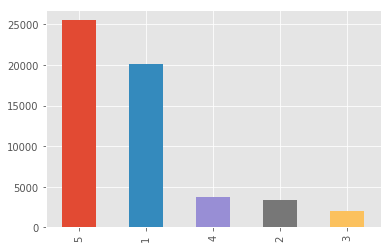

In [13]:
data.stars.value_counts().plot.bar()

## strip 1 5 stars

In [14]:
data = data.ix[np.where((data.stars==1)|(data.stars==5))]

data.head()

,stars,text
0,1,please stay away from this place if you can! it's the worst care imaginable! the staff is very uneducated and doesn't know anything. if you ask a question they give you an answer that doesn't even pertain to what you just asked. it's super bizarre. dr byrne doesn't seem to care at all about how you feel i got the impression she just wants to get you in and out and make her money. that's just the feeling that was put out there in my visit. the staff is super rude. i wanted to speak again with...
1,5,my husband has been a patient of dr. byrne for the last year and a half. last may he was suffering from kidney stones and we were referred to dr. byrne. after being examined and having tests run it was determined he would need surgery. he was scheduled for surgery a week later and sent home with major pain medications. even while taking the medications my husband was so incapacitated and in such pain dr. bryne went out of her way to call other hospitals and reschedule him for emergency surg...
4,1,"i wish i could give 0 stars. worst office i've ever been to. such a horrible experience!!! office staff is a bunch of teens with bad attitudes including the office manager. i made my appointment to consult dr. byrne at the ironwood gilbert location about my non-responsive to antibiotics uti. though there was an urgency as my symptoms kept getting worse and my pcp recommended seeing a urologist asap, the first appointment was available after10 days. i gave all my information including insuran..."
5,1,i went to the emergency room because i was having a kidney stone attack. the emergency room recommended i see dr. lauren byrne to resolve my kidney stone issue. i made the appointment and went in to see her. she was nice but very quick to get you in and out of your appointment. she asked the staff to put in for a cat scan at the ironwood scan facility and they would call me. i went in for my follow up appointment a week later and they had not called me for the scan. the office put in a...
6,5,"dr. byrne is an excellent doctor with all the right skills, including a very good bed side manner. i treated with her for prostate cancer. i originally went in for another issue but because of her thoroughness and the ability to spot red flags in the exam she decided to do a cancer screening. the test wasn't much fun, but it showed the early stages of cancer. she gave me my options and told me the positives and negatives of each option. when i decided to have surgery she turned me over ..."


In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45631 entries, 0 to 54755
Data columns (total 2 columns):
stars    45631 non-null int64
text     45631 non-null object
dtypes: int64(1), object(1)
memory usage: 1.0+ MB


## Change star value to 0,1
- 0 is 1 star
- 1 is 5 star

In [16]:
data.stars.replace(1,0,inplace=True)
data.stars.replace(5,1,inplace=True)

In [17]:
data.head()

,stars,text
0,0,please stay away from this place if you can! it's the worst care imaginable! the staff is very uneducated and doesn't know anything. if you ask a question they give you an answer that doesn't even pertain to what you just asked. it's super bizarre. dr byrne doesn't seem to care at all about how you feel i got the impression she just wants to get you in and out and make her money. that's just the feeling that was put out there in my visit. the staff is super rude. i wanted to speak again with...
1,1,my husband has been a patient of dr. byrne for the last year and a half. last may he was suffering from kidney stones and we were referred to dr. byrne. after being examined and having tests run it was determined he would need surgery. he was scheduled for surgery a week later and sent home with major pain medications. even while taking the medications my husband was so incapacitated and in such pain dr. bryne went out of her way to call other hospitals and reschedule him for emergency surg...
4,0,"i wish i could give 0 stars. worst office i've ever been to. such a horrible experience!!! office staff is a bunch of teens with bad attitudes including the office manager. i made my appointment to consult dr. byrne at the ironwood gilbert location about my non-responsive to antibiotics uti. though there was an urgency as my symptoms kept getting worse and my pcp recommended seeing a urologist asap, the first appointment was available after10 days. i gave all my information including insuran..."
5,0,i went to the emergency room because i was having a kidney stone attack. the emergency room recommended i see dr. lauren byrne to resolve my kidney stone issue. i made the appointment and went in to see her. she was nice but very quick to get you in and out of your appointment. she asked the staff to put in for a cat scan at the ironwood scan facility and they would call me. i went in for my follow up appointment a week later and they had not called me for the scan. the office put in a...
6,1,"dr. byrne is an excellent doctor with all the right skills, including a very good bed side manner. i treated with her for prostate cancer. i originally went in for another issue but because of her thoroughness and the ability to spot red flags in the exam she decided to do a cancer screening. the test wasn't much fun, but it showed the early stages of cancer. she gave me my options and told me the positives and negatives of each option. when i decided to have surgery she turned me over ..."


In [18]:
data.stars.value_counts()

1    25502
0    20129
Name: stars, dtype: int64

## D) Tokenization
Now we will tokenize all the cleaned tweets in our dataset. Tokens are individual terms or words, and tokenization is the process of splitting a string of text into tokens

In [19]:
%%time
tokenized_review = df.text.apply(lambda x: x.split())

CPU times: user 588 ms, sys: 256 ms, total: 844 ms
Wall time: 775 ms


In [20]:
tokenized_review.head()

0    [Please, stay, away, from, this, place, if, you, can!, It's, the, worst, care, imaginable!, The, staff, is, very, uneducated, and, doesn't, know, anything., If, you, ask, a, question, they, give, you, an, answer, that, doesn't, even, pertain, to, what, you, just, asked., It's, super, bizarre., Dr, Byrne, doesn't, seem, to, care, at, all, about, how, you, feel, I, got, the, impression, she, just, wants, to, get, you, in, and, out, and, make, her, money., That's, just, the, feeling, that, was,...
1    [My, husband, has, been, a, patient, of, Dr., Byrne, for, the, last, year, and, a, half., Last, May, he, was, suffering, from, kidney, stones, and, we, were, referred, to, Dr., Byrne., After, being, examined, and, having, tests, run, it, was, determined, he, would, need, surgery., He, was, scheduled, for, surgery, a, week, later, and, sent, home, with, major, pain, medications., Even, while, taking, the, medications, my, husband, was, so, incapacitated, and, in, such, pain, Dr., Bryne,

## E) Stemming
Stemming is a rule-based process of stripping the suffixes (“ing”, “ly”, “es”, “s” etc) from a word. For example, For example – “play”, “player”, “played”, “plays” and “playing” are the different variations of the word – “play”.

In [21]:
from nltk.stem.porter import *
stemmer = PorterStemmer()

tokenized_review = tokenized_review.apply(lambda x: [stemmer.stem(i) for i in x]) # stemming
tokenized_review.head()

0    [pleas, stay, away, from, thi, place, if, you, can!, it', the, worst, care, imaginable!, the, staff, is, veri, uneduc, and, doesn't, know, anything., If, you, ask, a, question, they, give, you, an, answer, that, doesn't, even, pertain, to, what, you, just, asked., it', super, bizarre., Dr, byrn, doesn't, seem, to, care, at, all, about, how, you, feel, I, got, the, impress, she, just, want, to, get, you, in, and, out, and, make, her, money., that', just, the, feel, that, wa, put, out, there, ...
1    [My, husband, ha, been, a, patient, of, dr., byrn, for, the, last, year, and, a, half., last, may, he, wa, suffer, from, kidney, stone, and, we, were, refer, to, dr., byrne., after, be, examin, and, have, test, run, it, wa, determin, he, would, need, surgery., He, wa, schedul, for, surgeri, a, week, later, and, sent, home, with, major, pain, medications., even, while, take, the, medic, my, husband, wa, so, incapacit, and, in, such, pain, dr., bryne, went, out, of, her, way, to, call, o

In [22]:
%%time
all_words = ' '.join([text for text in data.text])

CPU times: user 12 ms, sys: 8 ms, total: 20 ms
Wall time: 20.3 ms


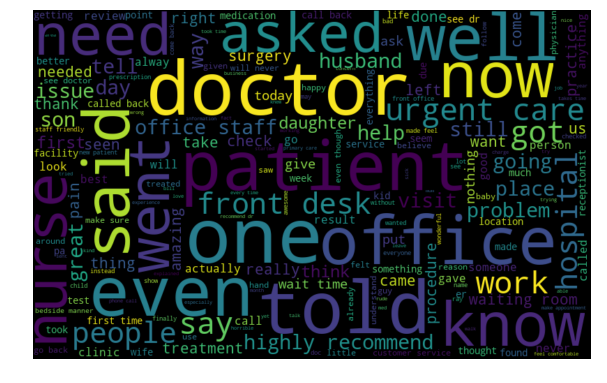

CPU times: user 19.7 s, sys: 840 ms, total: 20.5 s
Wall time: 20.3 s


In [23]:
%%time
from wordcloud import WordCloud
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(all_words)

plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

In [24]:
data.head()

,stars,text
0,0,please stay away from this place if you can! it's the worst care imaginable! the staff is very uneducated and doesn't know anything. if you ask a question they give you an answer that doesn't even pertain to what you just asked. it's super bizarre. dr byrne doesn't seem to care at all about how you feel i got the impression she just wants to get you in and out and make her money. that's just the feeling that was put out there in my visit. the staff is super rude. i wanted to speak again with...
1,1,my husband has been a patient of dr. byrne for the last year and a half. last may he was suffering from kidney stones and we were referred to dr. byrne. after being examined and having tests run it was determined he would need surgery. he was scheduled for surgery a week later and sent home with major pain medications. even while taking the medications my husband was so incapacitated and in such pain dr. bryne went out of her way to call other hospitals and reschedule him for emergency surg...
4,0,"i wish i could give 0 stars. worst office i've ever been to. such a horrible experience!!! office staff is a bunch of teens with bad attitudes including the office manager. i made my appointment to consult dr. byrne at the ironwood gilbert location about my non-responsive to antibiotics uti. though there was an urgency as my symptoms kept getting worse and my pcp recommended seeing a urologist asap, the first appointment was available after10 days. i gave all my information including insuran..."
5,0,i went to the emergency room because i was having a kidney stone attack. the emergency room recommended i see dr. lauren byrne to resolve my kidney stone issue. i made the appointment and went in to see her. she was nice but very quick to get you in and out of your appointment. she asked the staff to put in for a cat scan at the ironwood scan facility and they would call me. i went in for my follow up appointment a week later and they had not called me for the scan. the office put in a...
6,1,"dr. byrne is an excellent doctor with all the right skills, including a very good bed side manner. i treated with her for prostate cancer. i originally went in for another issue but because of her thoroughness and the ability to spot red flags in the exam she decided to do a cancer screening. the test wasn't much fun, but it showed the early stages of cancer. she gave me my options and told me the positives and negatives of each option. when i decided to have surgery she turned me over ..."


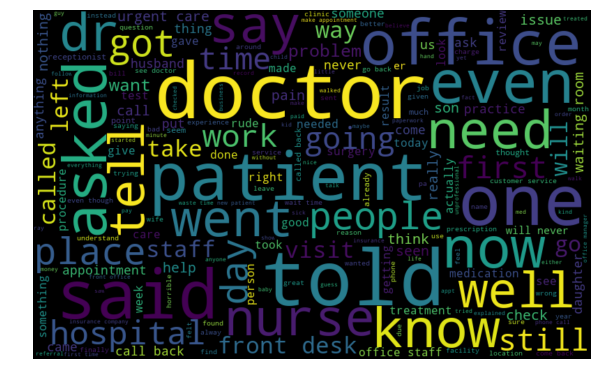

In [25]:
negative_words =' '.join([text for text in data['text'][data['stars'] == 0]])

wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(negative_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

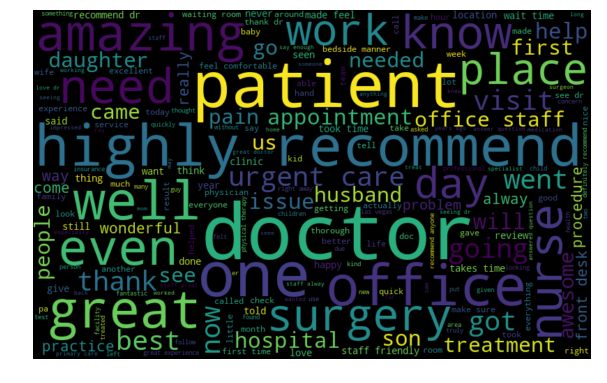

In [26]:
positive_words =' '.join([text for text in data['text'][data['stars'] == 1]])

wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(positive_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

## Bag-of-Words Features¶
Bag-of-Words is a method to represent text into numerical features. Consider a corpus (a collection of texts) called C of D documents {d1,d2…..dD} and N unique tokens extracted out of the corpus C. The N tokens (words) will form a list, and the size of the bag-of-words matrix M will be given by D X N. Each row in the matrix M contains the frequency of tokens in document D(i)

In [27]:
from sklearn.feature_extraction.text import CountVectorizer
bow_vectorizer = CountVectorizer(max_df=0.90, min_df=2, max_features=1000, stop_words='english')

In [28]:
%%time
# bag-of-words feature matrix
bow = bow_vectorizer.fit_transform(data.text)

CPU times: user 3.85 s, sys: 40 ms, total: 3.89 s
Wall time: 3.86 s


In [29]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45631 entries, 0 to 54755
Data columns (total 2 columns):
stars    45631 non-null int64
text     45631 non-null object
dtypes: int64(1), object(1)
memory usage: 1.0+ MB


In [30]:
type(bow)

scipy.sparse.csr.csr_matrix

In [31]:
bow.shape

(45631, 1000)

In [32]:
type(bow)

scipy.sparse.csr.csr_matrix

In [33]:
print(bow.toarray())

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 1 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [34]:
len(data.text)

45631

## TF-IDF Features
This is another method which is based on the frequency method but it is different to the bag-of-words approach in the sense that it takes into account, not just the occurrence of a word in a single document (or tweet) but in the entire corpus.
TF-IDF works by penalizing the common words by assigning them lower weights while giving importance to words which are rare in the entire corpus but appear in good numbers in few documents.
Let’s have a look at the important terms related to TF-IDF:
TF = (Number of times term t appears in a document)/(Number of terms in the document)
IDF = log(N/n), where, N is the number of documents and n is the number of documents a term t has appeared in.
TF-IDF = TF*IDF

In [35]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer(max_df=0.90, min_df=2, max_features=1000, stop_words='english')

In [36]:
# TF-IDF feature matrix
tfidf = tfidf_vectorizer.fit_transform(data['text'])

# 5. Model Building: Sentiment Analysis

In [37]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score

In [38]:
# train_bow = bow[:45631,:]
# test_bow = bow[45631:,:]


# splitting data into training and validation set
xtrain_bow, xvalid_bow, ytrain, yvalid = train_test_split(bow, data['stars'], random_state=42, test_size=0.3)

lreg = LogisticRegression()
lreg.fit(xtrain_bow, ytrain) # training the model

prediction = lreg.predict_proba(xvalid_bow) # predicting on the validation set
prediction_int = prediction[:,1] >= 0.3 # if prediction is greater than or equal to 0.3 than 1 else 0
prediction_int = prediction_int.astype(np.int)

f1_score(yvalid, prediction_int) # calculating f1 score

0.9565107458912768

In [39]:
accuracy_score(yvalid, prediction_int)

0.9497443389335282

In [40]:
xtrain_bow.shape  # .70

(31941, 1000)

In [41]:
xvalid_bow.shape  #.30

(13690, 1000)

In [42]:
ytrain.shape  # .70

(31941,)

In [43]:
yvalid.shape  #0.30

(13690,)

## Multinomial NB
-

In [44]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split

In [45]:
%%time
# 1&5 starts
review = data['text'].values.astype(str)
sentiments = data['stars'].values

# Split the data for training and for testing and shuffle it
X_train, X_test, y_train, y_test = train_test_split(review, sentiments,
test_size=0.2, shuffle=True)


vectorizer = CountVectorizer(lowercase=True)
# Compute the vocabulary only on the training data
vectorizer.fit(X_train)

# Transform the text list to a matrix form
X_train_vectorized = vectorizer.transform(X_train)

classifier = MultinomialNB()

# Train the classifier
classifier.fit(X_train_vectorized, y_train)

# Vectorize the test data
X_test_vectorized = vectorizer.transform(X_test)

# Check our classifier performance
score = classifier.score(X_test_vectorized, y_test)

print("1 & 5 stars\n Accuracy=", score) 

1 & 5 stars
 Accuracy= 0.9566122493700011
CPU times: user 9.74 s, sys: 544 ms, total: 10.3 s
Wall time: 10.3 s


## Multinomial NB Results


- 1 & 5 starts: `Accuracy= 0.9561894108873975`

## LogisticRegression

In [46]:
from sklearn.linear_model import LogisticRegression

In [47]:
%%time
# 1&5 starts
review = data['text'].values.astype(str)
sentiments = data['stars'].values

# Split the data for training and for testing and shuffle it
X_train, X_test, y_train, y_test = train_test_split(review, sentiments,
test_size=0.2, shuffle=True)


vectorizer = CountVectorizer(lowercase=True)
# Compute the vocabulary only on the training data
vectorizer.fit(X_train)

# Transform the text list to a matrix form
X_train_vectorized = vectorizer.transform(X_train)

classifier = LogisticRegression()


# Train the classifier
classifier.fit(X_train_vectorized, y_train)

# Vectorize the test data
X_test_vectorized = vectorizer.transform(X_test)

# Check our classifier performance
score = classifier.score(X_test_vectorized, y_test)

print("1 & 5 stars\n Accuracy=", score) 

1 & 5 stars
 Accuracy= 0.9719513531280816
CPU times: user 17 s, sys: 516 ms, total: 17.5 s
Wall time: 17.5 s


## LogisticRegression Results
- 1& 5 starts:` Accuracy= 0.97362043251305`


## Use Ngrams Instead of Words
- 1-3
- 1-2

In [48]:
%%time
# 1&5 starts
review = data['text'].values.astype(str)
sentiments = data['stars'].values

CPU times: user 72 ms, sys: 216 ms, total: 288 ms
Wall time: 287 ms


In [49]:
# Split the data for training and for testing and shuffle it
X_train, X_test, y_train, y_test = train_test_split(review, sentiments,
test_size=0.2, shuffle=True)

In [50]:
%%time
vectorizer = CountVectorizer(lowercase=True, ngram_range=(1,2))
# Compute the vocabulary only on the training data
vectorizer.fit(X_train)

# Transform the text list to a matrix form
X_train_vectorized = vectorizer.transform(X_train)

classifier = LogisticRegression()

# Train the classifier
classifier.fit(X_train_vectorized, y_train)

# Vectorize the test data
X_test_vectorized = vectorizer.transform(X_test)

# Check our classifier performance
score = classifier.score(X_test_vectorized, y_test)
print("Accuracy=", score)

Accuracy= 0.9788539498192177
CPU times: user 42.4 s, sys: 264 ms, total: 42.7 s
Wall time: 42.7 s


In [51]:
# Split the data for training and for testing and shuffle it
X_train, X_test, y_train, y_test = train_test_split(review, sentiments,
test_size=0.2, shuffle=True)

In [52]:
%%time
vectorizer = CountVectorizer(lowercase=True, ngram_range=(1,3))
# Compute the vocabulary only on the training data
vectorizer.fit(X_train)

# Transform the text list to a matrix form
X_train_vectorized = vectorizer.transform(X_train)

classifier = LogisticRegression()

# Train the classifier
classifier.fit(X_train_vectorized, y_train)

# Vectorize the test data
X_test_vectorized = vectorizer.transform(X_test)

# Check our classifier performance
score = classifier.score(X_test_vectorized, y_test)
print("Accuracy=", score)

Accuracy= 0.9771009093897228
CPU times: user 1min 24s, sys: 812 ms, total: 1min 24s
Wall time: 1min 24s


In [53]:
# Split the data for training and for testing and shuffle it
X_train, X_test, y_train, y_test = train_test_split(review, sentiments,
test_size=0.2, shuffle=True)

In [54]:
%%time
vectorizer = CountVectorizer(lowercase=True, ngram_range=(1,4))
# Compute the vocabulary only on the training data
vectorizer.fit(X_train)

# Transform the text list to a matrix form
X_train_vectorized = vectorizer.transform(X_train)

classifier = LogisticRegression()

# Train the classifier
classifier.fit(X_train_vectorized, y_train)

# Vectorize the test data
X_test_vectorized = vectorizer.transform(X_test)

# Check our classifier performance
score = classifier.score(X_test_vectorized, y_test)
print("Accuracy=", score)

KeyboardInterrupt: 

### Results
ngram_range=(1,2)
```
Accuracy= 0.8231508761048224
CPU times: user 10min 47s, sys: 27.3 s, total: 11min 14s
Wall time: 6min 58s
```

ngram_range=(1,3)
```
Accuracy= 0.829896107923709
CPU times: user 12min 47s, sys: 40.9 s, total: 13min 28s
Wall time: 9min 1s

```


- `Accuracy= 0.9793064876957495
`

#  pipeline
- Result `Accuracy= 0.9777218493661447`

In [55]:
from sklearn.pipeline import Pipeline

In [56]:
# Split the data for training and for testing and shuffle it
X_train, X_test, y_train, y_test = train_test_split(review, sentiments,
test_size=0.2, shuffle=True)

In [ ]:
%%time
# Put everything in a Pipeline
pipeline = Pipeline([
    ('vectorizer', 
     CountVectorizer(lowercase=True,ngram_range=(1, 3)))
    ,('classifier', LogisticRegression())])

pipeline.fit(X_train, y_train)
# Check our classifier performance

score = pipeline.score(X_test, y_test)

print("Accuracy=", score)

## Cross validation score

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.utils import shuffle

In [ ]:
%%time
# Put everything in a Pipeline
pipeline = Pipeline([
    ('vectorizer', CountVectorizer(
        lowercase=True,
        ngram_range=(1, 3))),
    ('classifier', LogisticRegression())])

In [ ]:
review, sentiments = shuffle(review, sentiments) # needed??

In [ ]:
review[9]

In [ ]:
len(sentiments)

In [ ]:
len(review)

In [ ]:
review[100]

In [ ]:
%%time
print("MeanAccuracy=", cross_val_score(pipeline, review, sentiments, cv=5).mean())

## Result:
```
MeanAccuracy= 0.9773477193058582
CPU times: user 10min 21s, sys: 44.1 s, total: 11min 5s
Wall time: 8min 45s

```

## Grid search

In [ ]:
from sklearn.model_selection import train_test_split, GridSearchCV

In [ ]:
# shuffle data
review, sentiments = shuffle(review, sentiments)

In [ ]:
%%time
# Put everything in a Pipeline
pipeline = Pipeline([
    ('vectorizer', CountVectorizer(
        lowercase=True,
        ngram_range=(1, 3))),
    ('classifier', LogisticRegression())])


classifier = GridSearchCV(pipeline, {
    # try out different ngram ranges
    'vectorizer__ngram_range': ((1, 2), (1, 3), (1, 4)),
    # check if setting all non zero counts to 1 makes a difference
    'vectorizer__binary': (True, False),},
                          n_jobs=-1, 
                          verbose=True,
                          error_score=0.0, 
                          cv=5)

In [ ]:
%%time
# Compute the vocabulary and train the classifier
classifier.fit(review, sentiments)

In [ ]:
print("Best Accuracy: ", classifier.best_score_)
print("Best Parameters: ", classifier.best_params_)

## notes
- find nums truep/true neg
- 